In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pickle
import numpy as np
import torch
from operator import itemgetter

In [2]:
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

methods = ['cff_0.0', 'rcexplainer_0.0', 'clear']
method_name_map = {
    'cff_0.0': 'CF$^2$',
    'rcexplainer_0.0': 'RCExplainer',
    'clear': 'CLEAR'
}
datasets = ["Mutagenicity", "Proteins"]

markers = {
    "cff_0.0": "o",
    "rcexplainer_0.0": "^",
    "clear": "D"
}

colors = {
    "cff_0.0": "teal",
    "rcexplainer_0.0": "tomato",
    "clear": "royalblue"
}

In [3]:
exps = ['random_top', 'feat']
choice = exps[0]
results = {}
explainer_name = ['cff_0.0', 'rcexplainer_0.0', 'clear']
if(choice == 'feat'):
    datasets = ['Proteins']
    noise_levels = [10,20,30,40,50]
else:
    datasets = ['Mutagenicity', 'Proteins', 'IMDB-B', 'AIDS']
    noise_levels = [1,2,3,4,5]
metrics = {'size', 'sufficiency', 'jaccard'}

In [4]:
for dataset in datasets:
    results[dataset] = {}
    for explainer in explainer_name:
        results[dataset][explainer] = {}
        result_folder = f'data/{dataset}/{explainer}/result/'
        try:
            if(choice == 'feat'):
                robustness_scores_dict = torch.load(result_folder + f'cf_stability_feature_noise_gcn_run_1.pt')
            else:
                robustness_scores_dict = torch.load(result_folder + f'cf_stability_noise_gcn_run_1.pt')
        except:
            print(f'error: {dataset}, {explainer}')
            continue
        for metric in metrics:
            results[dataset][explainer][f'mean_{metric}']  = []
            results[dataset][explainer][f'std_{metric}']  = []
            for noise in noise_levels:
                mean = robustness_scores_dict[noise][f'mean_{metric}']
                std = robustness_scores_dict[noise][f'std_{metric}']
                results[dataset][explainer][f'mean_{metric}'].append(mean)
                results[dataset][explainer][f'std_{metric}'].append(std)

error: Mutagenicity, clear
error: Proteins, clear


In [5]:
# for key in results.keys():
#     print(key, results[key])
results

{'Mutagenicity': {'cff_0.0': {'mean_size': [2.726, 2.698, 2.736, 2.721, 2.639],
   'std_size': [0.994, 1.044, 1.234, 1.177, 1.069],
   'mean_sufficiency': [0.556, 0.566, 0.598, 0.623, 0.621],
   'std_sufficiency': [0.062, 0.071, 0.061, 0.054, 0.044],
   'mean_jaccard': [0.913, 0.843, 0.799, 0.783, 0.76],
   'std_jaccard': [0.085, 0.097, 0.093, 0.092, 0.094]},
  'rcexplainer_0.0': {'mean_size': [1.024, 1.0, 1.0, 1.037, 1.008],
   'std_size': [0.345, 0.0, 0.0, 0.539, 0.128],
   'mean_sufficiency': [0.451, 0.467, 0.469, 0.508, 0.52],
   'std_sufficiency': [0.053, 0.045, 0.063, 0.041, 0.058],
   'mean_jaccard': [0.938, 0.909, 0.875, 0.848, 0.821],
   'std_jaccard': [0.056, 0.062, 0.069, 0.075, 0.088]},
  'clear': {}},
 'Proteins': {'cff_0.0': {'mean_size': [nan, 2.0, 2.5, 3.375, 4.0],
   'std_size': [nan, 0.0, 0.289, 0.25, 0.0],
   'mean_sufficiency': [1.0, 0.982, 0.964, 0.955, 0.973],
   'std_sufficiency': [0.0, 0.022, 0.034, 0.029, 0.022],
   'mean_jaccard': [nan, nan, nan, nan, nan],
  

In [6]:
# results = {
#     'Mutagenicity': {
#         'cff_0.0': {
#             'size': [2.825, 2.905, 2.8789473684210525, 2.75, 2.710059171597633],
#             'sufficiency': [0.54, 0.54, 0.56, 0.6, 0.61],
#             'jaccard': [0.909422351427361, 0.8334473481470271, 0.7972474300585657, 0.7736950901999539, 0.751023608728985]
#         },
#         'rc_0.0': {
#             'size': [1.037190082644628, 1.0, 1.0045045045045045, 1.0045045045045045, 1.0462962962962963],
#             'sufficiency': [0.44, 0.48, 0.49, 0.49, 0.5],
#             'jaccard': [0.9327751259838707, 0.8995743155944002, 0.8663030842662223, 0.8316208637667484, 0.8065299071375164]
#         },
#         # clear gave OOM
#     },
#     'Proteins': {
#         'cff_0.0': {
#             'size': [None, 2.0, 2.5, 3.6666666666666665, 4.5],
#             'sufficiency': [1, 0.99, 0.98, 0.97, 0.98],
#             'jaccard': [None, None, 0.875, 0.84 , 0.8076923076923077]
#         },
#         'rc_0.0': {
#             'size': [1.0, 1.0, 1.0, 1.0, 1.0],
#             'sufficiency': [0.87, 0.89, 0.91, 0.91, 0.91],
#             'jaccard': [0.8966043890276626, 0.831270778742689, 0.8052249139749139, 0.7471577194715624, 0.7457391257536606]
#         },
#         # clear gave OOM
#     },
#     'IMDB-B': {
#         'cff_0.0': {
#             'size': [8.954545454545455, 8.2, 8.95, 7.421052631578948, 8.666666666666666],
#             'sufficiency': [0.78, 0.8, 0.8, 0.81, 0.79],
#             'jaccard': [0.9347224686191609, 0.9412581769166176, 0.9350586171533662, 0.9159451230673958, 0.8887747404116896]
#         },
#         'rc_0.0': {
#             'size': [1.0, 1.0, 1.0, 1.0, 1.0],
#             'sufficiency': [0.72, 0.71, 0.72, 0.73, 0.73],
#             'jaccard': [0.9786381263682654, 0.960106923039747, 0.9421953471063502, 0.926008062408215, 0.9083986755988179]
#         },
#         'clear':  {
#             'size': [424.25, 421.75, 520.5, 452.0, 457.6666666666667],
#             'sufficiency': [0.96, 0.96, 0.98, 0.97, 0.97],
#             'jaccard': [1.0, 0.27763732931368323, 0.2636916446243201, 0.2849230360391668, 0.2695470582734493]
#         },
#     }
# }

In [7]:
labelsize = 14
ticksize = 12
markersize = 6
linewidth = 1.5
xticks = list(range(1, 6))
figsize = (12, 4)

# Jaccard

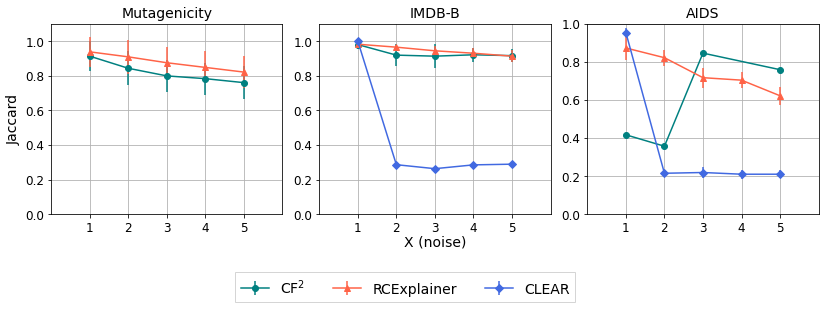

In [8]:
fig, axes = plt.subplots(1, 3, figsize=figsize, sharex=True)
ax1 = axes[0]
# ax2 = axes[1]
ax3 = axes[1]
ax4= axes[2]

# * ===== Axis 1
# muta_cff = ax1.plot(xticks, results['Mutagenicity']['cff_0.0']['mean_jaccard'], label=method_name_map['cff_0.0'], marker=markers['cff_0.0'], color=colors['cff_0.0'])
# muta_rc = ax1.plot(xticks, results['Mutagenicity']['rcexplainer_0.0']['mean_jaccard'], label=method_name_map['rcexplainer_0.0'], marker=markers['rcexplainer_0.0'], color=colors['rcexplainer_0.0'])
muta_cff = ax1.errorbar(
    xticks,
    results['Mutagenicity']['cff_0.0']['mean_jaccard'],
    results['Mutagenicity']['cff_0.0']['std_jaccard'],
    label=method_name_map['cff_0.0'],
    marker=markers['cff_0.0'],
    color=colors['cff_0.0']
)
muta_rc = ax1.errorbar(
    xticks,
    results['Mutagenicity']['rcexplainer_0.0']['mean_jaccard'],
    results['Mutagenicity']['cff_0.0']['std_jaccard'],
    label=method_name_map['rcexplainer_0.0'],
    marker=markers['rcexplainer_0.0'],
    color=colors['rcexplainer_0.0']
)
ax1.minorticks_off()
ax1.set_title('Mutagenicity', fontsize=labelsize)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticks)
ax1.tick_params(axis='x', labelsize=ticksize)
ax1.tick_params(axis='y', labelsize=ticksize)
ax1.set_ylim(0, 1.1)
ax1.set_xlim(0, 6)
ax1.grid(True)
# * Y label of the plot.
ax1.set_ylabel("Jaccard", fontsize=labelsize)


# * ===== Axis 2
# proteins_cff = ax2.plot(xticks, results['Proteins']['cff_0.0']['mean_jaccard'], label=method_name_map['cff_0.0'], marker=markers['cff_0.0'], color=colors['cff_0.0'])
# proteins_rc = ax2.plot(xticks, results['Proteins']['rcexplainer_0.0']['mean_jaccard'], label=method_name_map['rcexplainer_0.0'], marker=markers['rcexplainer_0.0'], color=colors['rcexplainer_0.0'])
# proteins_cff = ax2.errorbar(xticks, results['Proteins']['cff_0.0']['mean_jaccard'], results['Proteins']['cff_0.0']['std_jaccard'], label=method_name_map['cff_0.0'], marker=markers['cff_0.0'], color=colors['cff_0.0'])
# proteins_rc = ax2.errorbar(xticks, results['Proteins']['rcexplainer_0.0']['mean_jaccard'], results['Proteins']['rcexplainer_0.0']['std_jaccard'], label=method_name_map['rcexplainer_0.0'], marker=markers['rcexplainer_0.0'], color=colors['rcexplainer_0.0'])
# ax2.minorticks_off()
# ax2.set_title('Proteins', fontsize=labelsize)
# ax2.set_xticks(xticks)
# ax2.set_xticklabels(xticks)
# ax2.tick_params(axis='x', labelsize=ticksize)
# ax2.tick_params(axis='y', labelsize=ticksize)
# ax2.set_ylim(0, 1.1)
# ax2.set_xlim(0, 6)
# ax2.grid(True)


# * ===== Axis 3
# imdb_cff = ax3.plot(xticks, results['IMDB-B']['cff_0.0']['mean_jaccard'], label=method_name_map['cff_0.0'], marker=markers['cff_0.0'], color=colors['cff_0.0'])
# imdb_rc = ax3.plot(xticks, results['IMDB-B']['rcexplainer_0.0']['mean_jaccard'], label=method_name_map['rcexplainer_0.0'], marker=markers['rcexplainer_0.0'], color=colors['rcexplainer_0.0'])
# imdb_clear = ax3.plot(xticks, results['IMDB-B']['clear']['mean_jaccard'], label=method_name_map['clear'], marker=markers['clear'], color=colors['clear'])
imdb_cff = ax3.errorbar(
    xticks,
    results['IMDB-B']['cff_0.0']['mean_jaccard'],
    results['IMDB-B']['cff_0.0']['std_jaccard'],
    label=method_name_map['cff_0.0'],
    marker=markers['cff_0.0'],
    color=colors['cff_0.0']
)
imdb_rc = ax3.errorbar(
    xticks,
    results['IMDB-B']['rcexplainer_0.0']['mean_jaccard'],
    results['IMDB-B']['rcexplainer_0.0']['std_jaccard'],
    label=method_name_map['rcexplainer_0.0'],
    marker=markers['rcexplainer_0.0'],
    color=colors['rcexplainer_0.0']
)
imdb_clear = ax3.errorbar(
    xticks,
    results['IMDB-B']['clear']['mean_jaccard'],
    results['IMDB-B']['clear']['std_jaccard'],
    label=method_name_map['clear'],
    marker=markers['clear'],
    color=colors['clear']
)
ax3.minorticks_off()
ax3.set_title('IMDB-B', fontsize=labelsize)
ax3.set_xticks(xticks)
ax3.set_xticklabels(xticks)
ax3.tick_params(axis='x', labelsize=ticksize)
ax3.tick_params(axis='y', labelsize=ticksize)
ax3.set_ylim(0, 1.1)
ax3.set_xlim(0, 6)
ax3.grid(True)


# * ===== Axis 4
# aids_cff = ax4.plot(xticks, results['AIDS']['cff_0.0']['mean_jaccard'], label=method_name_map['cff_0.0'], marker=markers['cff_0.0'], color=colors['cff_0.0'])
# aids_rc = ax4.plot(xticks, results['AIDS']['rcexplainer_0.0']['mean_jaccard'], label=method_name_map['rcexplainer_0.0'], marker=markers['rcexplainer_0.0'], color=colors['rcexplainer_0.0'])
# aids_clear = ax4.plot(xticks, results['AIDS']['clear']['mean_jaccard'], label=method_name_map['clear'], marker=markers['clear'], color=colors['clear'])
aids_cff = ax4.errorbar(
    list(itemgetter(0,1,2,4)(xticks)), #nan at index 3
    list(itemgetter(0,1,2,4)(results['AIDS']['cff_0.0']['mean_jaccard'])),
    list(itemgetter(0,1,2,4)(results['AIDS']['cff_0.0']['std_jaccard'])),
    label=method_name_map['cff_0.0'],
    marker=markers['cff_0.0'],
    color=colors['cff_0.0']
)
aids_rc = ax4.errorbar(
    xticks, 
    results['AIDS']['rcexplainer_0.0']['mean_jaccard'], 
    results['AIDS']['rcexplainer_0.0']['std_jaccard'], 
    label=method_name_map['rcexplainer_0.0'], 
    marker=markers['rcexplainer_0.0'], 
    color=colors['rcexplainer_0.0']
)
aids_clear = ax4.errorbar(
    xticks,
    results['AIDS']['clear']['mean_jaccard'], 
    results['AIDS']['clear']['std_jaccard'], 
    label=method_name_map['clear'], 
    marker=markers['clear'], 
    color=colors['clear']
)
ax4.minorticks_off()
ax4.set_title('AIDS', fontsize=labelsize)
ax4.set_xticks(xticks)
ax4.set_xticklabels(xticks)
ax4.tick_params(axis='x', labelsize=ticksize)
ax4.tick_params(axis='y', labelsize=ticksize)
ax4.set_ylim(0, 1)
ax4.set_xlim(0, 6)
ax4.grid(True)


# * ===== Plot
# Add common x axis.
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel('X (noise)', fontsize=labelsize)

handles = [muta_cff, muta_rc, imdb_clear]
fig.legend(
    handles=handles, 
    loc='lower center', 
    bbox_to_anchor=(0.5, -0.1), 
    fancybox=False, 
    shadow=False, 
    ncol=3, 
    fontsize=labelsize
)

fig.tight_layout()
plt.savefig("jaccard-vs-noise-cf.pdf", bbox_inches='tight')
plt.show()

# Size

/home/graphAttack/anaconda3/envs/GNNEx/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/graphAttack/anaconda3/envs/GNNEx/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/home/graphAttack/anaconda3/envs/GNNEx/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/graphAttack/anaconda3/envs/GNNEx/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/home/graphAttack/anaconda3/envs/GNNEx/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  

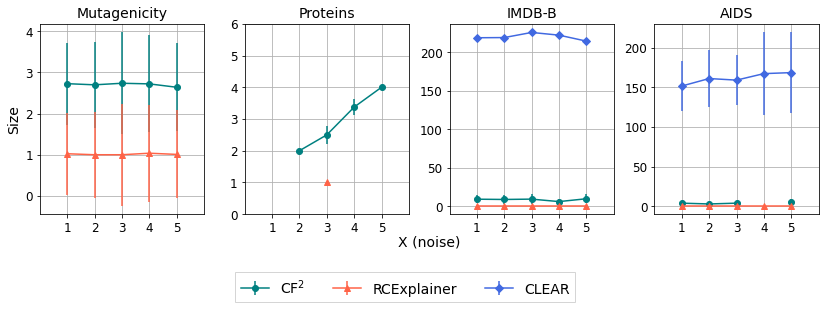

In [9]:
fig, axes = plt.subplots(1, 4, figsize=figsize, sharex=True)
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
ax4= axes[3]


# * ===== Axis 1
# muta_cff = ax1.plot(xticks, results['Mutagenicity']['cff_0.0']['mean_size'], label=method_name_map['cff_0.0'], marker=markers['cff_0.0'], color=colors['cff_0.0'])
# muta_rc = ax1.plot(xticks, results['Mutagenicity']['rcexplainer_0.0']['mean_size'], label=method_name_map['rcexplainer_0.0'], marker=markers['rcexplainer_0.0'], color=colors['rcexplainer_0.0'])
muta_cff = ax1.errorbar(
    xticks, 
    results['Mutagenicity']['cff_0.0']['mean_size'],
    results['Mutagenicity']['cff_0.0']['std_size'],
    label=method_name_map['cff_0.0'], 
    marker=markers['cff_0.0'], 
    color=colors['cff_0.0']
)
muta_rc = ax1.errorbar(
    xticks, 
    results['Mutagenicity']['rcexplainer_0.0']['mean_size'],
    results['Mutagenicity']['cff_0.0']['std_size'],
    label=method_name_map['rcexplainer_0.0'], 
    marker=markers['rcexplainer_0.0'], 
    color=colors['rcexplainer_0.0']
)
ax1.minorticks_off()
ax1.set_title('Mutagenicity', fontsize=labelsize)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticks)
ax1.tick_params(axis='x', labelsize=ticksize)
ax1.tick_params(axis='y', labelsize=ticksize)
# ax1.set_ylim(0, 1)
ax1.set_xlim(0, 6)
ax1.grid(True)
# * Y label of the plot.
ax1.set_ylabel("Size", fontsize=labelsize)


# * ===== Axis 2
proteins_cff = ax2.errorbar(
    xticks, 
    results['Proteins']['cff_0.0']['mean_size'], 
    results['Proteins']['cff_0.0']['std_size'], 
    label=method_name_map['cff_0.0'], 
    marker=markers['cff_0.0'], 
    color=colors['cff_0.0']
)
proteins_rc = ax2.errorbar(
    xticks, 
    results['Proteins']['rcexplainer_0.0']['mean_size'], 
    results['Proteins']['rcexplainer_0.0']['std_size'],
    label=method_name_map['rcexplainer_0.0'],
    marker=markers['rcexplainer_0.0'],
    color=colors['rcexplainer_0.0']
)
ax2.minorticks_off()
ax2.set_title('Proteins', fontsize=labelsize)
ax2.set_xticks(xticks)
ax2.set_xticklabels(xticks)
ax2.tick_params(axis='x', labelsize=ticksize)
ax2.tick_params(axis='y', labelsize=ticksize)
ax2.set_ylim(0, 6)
ax2.set_xlim(0, 6)
ax2.grid(True)


# * ===== Axis 3
# imdb_cff = ax3.plot(xticks, results['IMDB-B']['cff_0.0']['mean_size'], label=method_name_map['cff_0.0'], marker=markers['cff_0.0'], color=colors['cff_0.0'])
# imdb_rc = ax3.plot(xticks, results['IMDB-B']['rcexplainer_0.0']['mean_size'], label=method_name_map['rcexplainer_0.0'], marker=markers['rcexplainer_0.0'], color=colors['rcexplainer_0.0'])
# imdb_clear = ax3.plot(xticks, results['IMDB-B']['clear']['mean_size'], label=method_name_map['clear'], marker=markers['clear'], color=colors['clear'])
imdb_cff = ax3.errorbar(
    xticks, 
    results['IMDB-B']['cff_0.0']['mean_size'], 
    results['IMDB-B']['cff_0.0']['std_size'], 
    label=method_name_map['cff_0.0'], 
    marker=markers['cff_0.0'], 
    color=colors['cff_0.0']
)
imdb_rc = ax3.errorbar(
    xticks, 
    results['IMDB-B']['rcexplainer_0.0']['mean_size'], 
    results['IMDB-B']['rcexplainer_0.0']['std_size'], 
    label=method_name_map['rcexplainer_0.0'], 
    marker=markers['rcexplainer_0.0'], color=colors['rcexplainer_0.0']
)
imdb_clear = ax3.errorbar(
    xticks, 
    results['IMDB-B']['clear']['mean_size'], 
    results['IMDB-B']['clear']['std_size'], 
    label=method_name_map['clear'], 
    marker=markers['clear'], 
    color=colors['clear']
)
ax3.minorticks_off()
ax3.set_title('IMDB-B', fontsize=labelsize)
ax3.set_xticks(xticks)
ax3.set_xticklabels(xticks)
ax3.tick_params(axis='x', labelsize=ticksize)
ax3.tick_params(axis='y', labelsize=ticksize)
# ax3.set_ylim(0, 1.1)
ax3.set_xlim(0, 6)
ax3.grid(True)


# * ===== Axis 4
# aids_cff = ax4.plot(xticks, results['AIDS']['cff_0.0']['mean_size'], label=method_name_map['cff_0.0'], marker=markers['cff_0.0'], color=colors['cff_0.0'])
# aids_rc = ax4.plot(xticks, results['AIDS']['rcexplainer_0.0']['mean_size'], label=method_name_map['rcexplainer_0.0'], marker=markers['rcexplainer_0.0'], color=colors['rcexplainer_0.0'])
# aids_clear = ax4.plot(xticks, results['AIDS']['clear']['mean_size'], label=method_name_map['clear'], marker=markers['clear'], color=colors['clear'])
aids_cff = ax4.errorbar(
    xticks, 
    results['AIDS']['cff_0.0']['mean_size'], 
    results['AIDS']['cff_0.0']['std_size'], 
    label=method_name_map['cff_0.0'], 
    marker=markers['cff_0.0'], 
    color=colors['cff_0.0']
)
aids_rc = ax4.errorbar(
    xticks, 
    results['AIDS']['rcexplainer_0.0']['mean_size'], 
    results['AIDS']['rcexplainer_0.0']['std_size'], 
    label=method_name_map['rcexplainer_0.0'], 
    marker=markers['rcexplainer_0.0'], 
    color=colors['rcexplainer_0.0']
)
aids_clear = ax4.errorbar(
    xticks, 
    results['AIDS']['clear']['mean_size'], 
    results['AIDS']['clear']['std_size'], 
    label=method_name_map['clear'], 
    marker=markers['clear'], 
    color=colors['clear']
)
ax4.minorticks_off()
ax4.set_title('AIDS', fontsize=labelsize)
ax4.set_xticks(xticks)
ax4.set_xticklabels(xticks)
ax4.tick_params(axis='x', labelsize=ticksize)
ax4.tick_params(axis='y', labelsize=ticksize)
# ax4.set_ylim(0, 1.1)
ax4.set_xlim(0, 6)
ax4.grid(True)


# * ===== Plot
# Add common x axis.
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel('X (noise)', fontsize=labelsize)

handles = [muta_cff, muta_rc, imdb_clear]
fig.legend(
    handles=handles,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.1),
    fancybox=False,
    shadow=False,
    ncol=3,
    fontsize=labelsize
)
fig.tight_layout()
plt.savefig("size-vs-noise-cf.pdf", bbox_inches='tight')
plt.show()

# Sufficiency

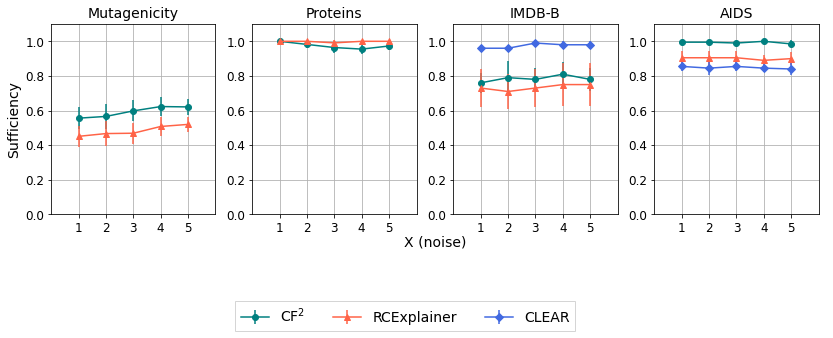

In [10]:
fig, axes = plt.subplots(1, 4, figsize=figsize, sharex=True)
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
ax4= axes[3]


# * ========== Axis 1
# muta_cff = ax1.plot(xticks, results['Mutagenicity']['cff_0.0']['mean_sufficiency'], label=method_name_map['cff_0.0'], marker=markers['cff_0.0'], color=colors['cff_0.0'])
# muta_rc = ax1.plot(xticks, results['Mutagenicity']['rcexplainer_0.0']['mean_sufficiency'], label=method_name_map['rcexplainer_0.0'], marker=markers['rcexplainer_0.0'], color=colors['rcexplainer_0.0'])
muta_cff = ax1.errorbar(
    xticks, 
    results['Mutagenicity']['cff_0.0']['mean_sufficiency'],
    results['Mutagenicity']['cff_0.0']['std_sufficiency'],
    label=method_name_map['cff_0.0'], 
    marker=markers['cff_0.0'],
    color=colors['cff_0.0']
)
muta_rc = ax1.errorbar(
    xticks, 
    results['Mutagenicity']['rcexplainer_0.0']['mean_sufficiency'],
    results['Mutagenicity']['cff_0.0']['std_sufficiency'] ,
    label=method_name_map['rcexplainer_0.0'], 
    marker=markers['rcexplainer_0.0'], 
    color=colors['rcexplainer_0.0']
)
ax1.minorticks_off()
ax1.set_title('Mutagenicity', fontsize=labelsize)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticks)
ax1.tick_params(axis='x', labelsize=ticksize)
ax1.tick_params(axis='y', labelsize=ticksize)
ax1.set_ylim(0, 1.1)
ax1.set_xlim(0, 6)
ax1.grid(True)
# * Y label of the plot.
ax1.set_ylabel("Sufficiency", fontsize=labelsize)


# * ========== Axis 2
# proteins_cff = ax2.plot(xticks, results['Proteins']['cff_0.0']['mean_sufficiency'], label=method_name_map['cff_0.0'], marker=markers['cff_0.0'], color=colors['cff_0.0'])
# proteins_rc = ax2.plot(xticks, results['Proteins']['rcexplainer_0.0']['mean_sufficiency'], label=method_name_map['rcexplainer_0.0'], marker=markers['rcexplainer_0.0'], color=colors['rcexplainer_0.0'])
proteins_cff = ax2.errorbar(
    xticks, 
    results['Proteins']['cff_0.0']['mean_sufficiency'], 
    results['Proteins']['cff_0.0']['std_sufficiency'], 
    label=method_name_map['cff_0.0'], 
    marker=markers['cff_0.0'], 
    color=colors['cff_0.0']
)
proteins_rc = ax2.errorbar(
    xticks, 
    results['Proteins']['rcexplainer_0.0']['mean_sufficiency'], 
    results['Proteins']['rcexplainer_0.0']['std_sufficiency'],
    label=method_name_map['rcexplainer_0.0'],
    marker=markers['rcexplainer_0.0'],
    color=colors['rcexplainer_0.0']
)
ax2.minorticks_off()
ax2.set_title('Proteins', fontsize=labelsize)
ax2.set_xticks(xticks)
ax2.set_xticklabels(xticks)
ax2.tick_params(axis='x', labelsize=ticksize)
ax2.tick_params(axis='y', labelsize=ticksize)
ax2.set_ylim(0, 1.1)
ax2.set_xlim(0, 6)
ax2.grid(True)


# * ========== Axis 3
# imdb_cff = ax3.plot(xticks, results['IMDB-B']['cff_0.0']['mean_sufficiency'], label=method_name_map['cff_0.0'], marker=markers['cff_0.0'], color=colors['cff_0.0'])
# imdb_rc = ax3.plot(xticks, results['IMDB-B']['rcexplainer_0.0']['mean_sufficiency'], label=method_name_map['rcexplainer_0.0'], marker=markers['rcexplainer_0.0'], color=colors['rcexplainer_0.0'])
# imdb_clear = ax3.plot(xticks, results['IMDB-B']['clear']['mean_sufficiency'], label=method_name_map['clear'], marker=markers['clear'], color=colors['clear'])
imdb_cff = ax3.errorbar(
    xticks, 
    results['IMDB-B']['cff_0.0']['mean_sufficiency'], 
    results['IMDB-B']['cff_0.0']['std_sufficiency'], 
    label=method_name_map['cff_0.0'], 
    marker=markers['cff_0.0'], 
    color=colors['cff_0.0']
)
imdb_rc = ax3.errorbar(
    xticks, 
    results['IMDB-B']['rcexplainer_0.0']['mean_sufficiency'], 
    results['IMDB-B']['rcexplainer_0.0']['std_sufficiency'], 
    label=method_name_map['rcexplainer_0.0'], 
    marker=markers['rcexplainer_0.0'],
    color=colors['rcexplainer_0.0']
)
imdb_clear = ax3.errorbar(
    xticks, 
    results['IMDB-B']['clear']['mean_sufficiency'], 
    results['IMDB-B']['clear']['std_sufficiency'], 
    label=method_name_map['clear'], 
    marker=markers['clear'], 
    color=colors['clear']
)
ax3.minorticks_off()
ax3.set_title('IMDB-B', fontsize=labelsize)
ax3.set_xticks(xticks)
ax3.set_xticklabels(xticks)
ax3.tick_params(axis='x', labelsize=ticksize)
ax3.tick_params(axis='y', labelsize=ticksize)
ax3.set_ylim(0, 1.1)
ax3.set_xlim(0, 6)
ax3.grid(True)


# * ========== Axis 4
# aids_cff = ax4.plot(xticks, results['AIDS']['cff_0.0']['mean_size'], label=method_name_map['cff_0.0'], marker=markers['cff_0.0'], color=colors['cff_0.0'])
# aids_rc = ax4.plot(xticks, results['AIDS']['rcexplainer_0.0']['mean_size'], label=method_name_map['rcexplainer_0.0'], marker=markers['rcexplainer_0.0'], color=colors['rcexplainer_0.0'])
# aids_clear = ax4.plot(xticks, results['AIDS']['clear']['mean_size'], label=method_name_map['clear'], marker=markers['clear'], color=colors['clear'])
aids_cff = ax4.errorbar(
    xticks, 
    results['AIDS']['cff_0.0']['mean_sufficiency'], 
    results['AIDS']['cff_0.0']['std_sufficiency'], 
    label=method_name_map['cff_0.0'], 
    marker=markers['cff_0.0'], 
    color=colors['cff_0.0']
)
aids_rc = ax4.errorbar(
    xticks, 
    results['AIDS']['rcexplainer_0.0']['mean_sufficiency'], 
    results['AIDS']['rcexplainer_0.0']['std_sufficiency'], 
    label=method_name_map['rcexplainer_0.0'], 
    marker=markers['rcexplainer_0.0'], 
    color=colors['rcexplainer_0.0']
)
aids_clear = ax4.errorbar(
    xticks, 
    results['AIDS']['clear']['mean_sufficiency'], 
    results['AIDS']['clear']['std_sufficiency'], 
    label=method_name_map['clear'], 
    marker=markers['clear'], 
    color=colors['clear']
)
ax4.minorticks_off()
ax4.set_title('AIDS', fontsize=labelsize)
ax4.set_xticks(xticks)
ax4.set_xticklabels(xticks)
ax4.tick_params(axis='x', labelsize=ticksize)
ax4.tick_params(axis='y', labelsize=ticksize)
ax4.set_ylim(0, 1.1)
ax4.set_xlim(0, 6)
ax4.grid(True)


# * ========== Plot
# Add common x axis.
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel('X (noise)', fontsize=labelsize)

handles = [muta_cff, muta_rc, imdb_clear]
fig.legend(
    handles=handles, 
    loc='lower center', 
    bbox_to_anchor=(0.5, -0.2), 
    fancybox=False, 
    shadow=False, 
    ncol=3, 
    fontsize=labelsize
)
fig.tight_layout()
plt.savefig("suff-vs-noise-cf.pdf", bbox_inches='tight')
plt.show()